## Final Project Submission

Please fill out:
* Student name: Elly Kemboi
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Mark Tiba
* Blog post URL:


**Business Question**


Microsoft sees all of the big corporations producing original video content and wants in on the action. They've chosen to start a new movie company, but they know nothing about filmmaking. You are tasked with determining which types of films are currently performing well at the box office. You must next transform your findings into actionable insights that the head of Microsoft's new film company may utilize to help decide what kinds of films to make.

**Problem Statement**

Microsoft, mindful of the success of large organizations producing original video content, intends to create its own film production company. However, because Microsoft lacks filmmaking experience, it must determine the types of films that are now thriving at the box office. The assignment is to undertake extensive study and analysis in order to identify the genres and characteristics of successful films. The findings should be actionable and help the CEO of Microsoft's new film firm make informed decisions about the types of films to produce.

**Defining the Metrics for Success**

~ Return On Investment
This profitability metric evaluates how well an investment has performed. The formular for calculating the ROI: 


        ROI = (Current Value - Initial Value ) / Initial Value


**Reading the Data**

We begin by first importing python libraries

In [440]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import seaborn as sns
import datashader as ds
import datashader.transfer_functions as tf

Reading Files


We will now check the 'bom.movie_gross.csv' file and make analysis form there.

In [441]:
#This displays the first 5 rows and columns in our dataset

df = pd.read_csv('bom.movie_gross.csv')
df.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Checking the Data

In [442]:
#Determining the no. of titles in our dataset

df['title']


0                                       Toy Story 3
1                        Alice in Wonderland (2010)
2       Harry Potter and the Deathly Hallows Part 1
3                                         Inception
4                               Shrek Forever After
                           ...                     
3382                                      The Quake
3383                    Edward II (2018 re-release)
3384                                       El Pacto
3385                                       The Swan
3386                              An Actor Prepares
Name: title, Length: 3387, dtype: object

From the above cell, we can identify that there are 3387 movie titles

In [443]:
#We check the list of columns in the data to know what columns to work with

df.columns         


Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [444]:
#We check if there are any missing values in out dataframe and returns a boolean value

print('Any missing value?', df.isnull().values.any())


Any missing value? True


In [445]:
df.isnull()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [446]:
#We check the total number of missing values in each column

df.isnull().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

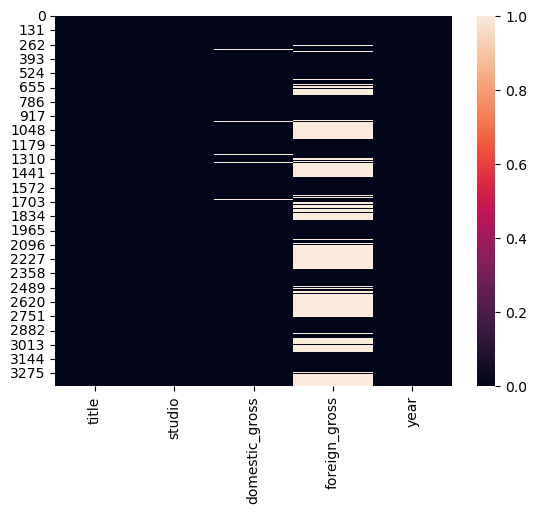

In [447]:
#Using a heatmap to show which columns have missng values and how many are missing on each.

sns.heatmap(df.isnull())
plt.show()


In [448]:
#We then drop the rows with the missing values

df.dropna(axis=0, inplace=True)
df


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [449]:
#We then check a summary statistic of the dataframe

df.describe(include='all')


,title,studio,domestic_gross,foreign_gross,year
count,2007,2007,2.007000e+03,2007,2007.000000
unique,2007,172,NaN,1193,NaN
top,Toy Story 3,Uni.,NaN,1200000,NaN
freq,1,144,NaN,23,NaN
mean,NaN,NaN,4.701984e+07,NaN,2013.506228
std,NaN,NaN,8.162689e+07,NaN,2.597997
min,NaN,NaN,4.000000e+02,NaN,2010.000000
25%,NaN,NaN,6.700000e+05,NaN,2011.000000
50%,NaN,NaN,1.670000e+07,NaN,2013.000000
75%,NaN,NaN,5.605000e+07,NaN,2016.000000


'An Actor Prepares' appears to be the last movie title in our data set

In [450]:
#We check the total domestic sales

df['domestic_gross'].sum()


94368819285.0

The counts of all the output generated within the borders of a country totalled to 96,557,293,580

In [451]:
df['foreign_gross']

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3275      1500000
3286       229000
3309       256000
3342         5200
3353        30000
Name: foreign_gross, Length: 2007, dtype: object

The 'foreign_domestic' column contains missing values and they need to be dropped

In [452]:
#We drop the rows in the foreign_gross column 

df = df.dropna(subset=['foreign_gross'])
df['foreign_gross']


0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3275      1500000
3286       229000
3309       256000
3342         5200
3353        30000
Name: foreign_gross, Length: 2007, dtype: object

Most Popular Movie Title (Sales)

In [453]:
#Checking for the movie title with the highest gross value

df[df['domestic_gross'].max() == df['domestic_gross']]     


,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015


The highest domestic gross matches to the movie title Star Wars: The Force Awakens

In [454]:
df['studio']

0                 BV
1                 BV
2                 WB
3                 WB
4               P/DW
            ...     
3275             LGF
3286             IFC
3309      Grindstone
3342    Darin Southa
3353              FM
Name: studio, Length: 2007, dtype: object

In [455]:
#We check the studio that has created the most movie titles

df['studio'].mode()



0    Uni.
Name: studio, dtype: object

Analysis:


'Universal Studios' appears to have created several movie titles

In [456]:
#We check the number the sales made each year

df.groupby('year')['domestic_gross'].mean().sort_values(ascending=False)


year
2018    6.222173e+07
2017    5.941676e+07
2016    5.661299e+07
2015    5.655194e+07
2013    5.279425e+07
2012    4.402413e+07
2014    4.336745e+07
2011    3.419203e+07
2010    3.296345e+07
Name: domestic_gross, dtype: float64

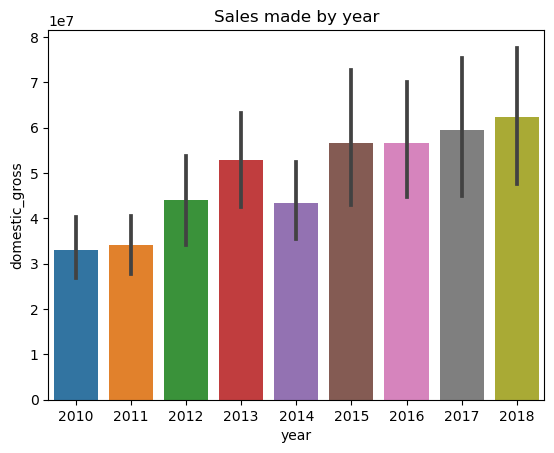

In [457]:
#We check the number the sales made each year 

sns.barplot(x='year', y='domestic_gross', data=df)
plt.title('Sales made by year')
plt.show()


From analysis 2018 made the highest sales compared to previous years while both 2011 and 2015 made the least


Checking the 'tn.movie_budgets.csv'

In [458]:
#Reading the 'tn.movie_budgets.csv' file

df = pd.read_csv('tn.movie_budgets.csv')
df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [459]:
#Checking the summary statistic of the dataframe 

df.describe(include = 'all')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5782,5782,5782,5782
unique,NaN,2418,5698,509,5164,5356
top,NaN,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,NaN,24,3,231,548,367
mean,50.372363,NaN,NaN,NaN,NaN,NaN
std,28.821076,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN,NaN,NaN
50%,50.000000,NaN,NaN,NaN,NaN,NaN
75%,75.000000,NaN,NaN,NaN,NaN,NaN


In [460]:
#Checking the top 10 movie titles that made the most sales worldwide

top10 = df.sort_values('worldwide_gross', ascending=False)[['movie', 'worldwide_gross']].head(10)\
.set_index('movie')
top10


,worldwide_gross
movie,
Fifty Dead Men Walking,"$997,921"
Duma,"$994,790"
Insidious,"$99,870,886"
Hellboy,"$99,823,958"
Mad Max,"$99,750,000"
Alpha,"$99,624,873"
Street Fighter,"$99,423,000"
Nacho Libre,"$99,296,462"
Desert Blue,"$99,147"


In [461]:
#We check the list of columns in the data to know what columns to work with

df.columns


Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [462]:
df['production_budget']

0       $425,000,000
1       $410,600,000
2       $350,000,000
3       $330,600,000
4       $317,000,000
            ...     
5777          $7,000
5778          $6,000
5779          $5,000
5780          $1,400
5781          $1,100
Name: production_budget, Length: 5782, dtype: object

From analysis, it appears that if the production budget is high it yeilds both high domestic gross and foreign gross

Checking the 'Movies.csv' file

In [463]:
#Checking the 'Movies.csv' file

df = pd.read_csv('tmdb.movies.csv')
df.head(10)



,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [464]:
#Checking if there are missing values in the dataframe

print('Any missing value?', df.isnull().values.any())


Any missing value? False


In [465]:
#Checking if there are missing values in the dataframe

duplicated_data = df.duplicated().any()
print('Are there any duplicated values?', duplicated_data)


Are there any duplicated values? False


In [466]:
#We check the list of columns in the data to know what columns to work with

df.describe()


,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [467]:
#We check the list of columns in the data to know what columns to work with
df.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [468]:
df.groupby('title')['popularity'].mean().sort_values(ascending=False)

title
Avengers: Infinity War                       80.773
John Wick                                    78.123
Spider-Man: Into the Spider-Verse            60.534
The Hobbit: The Battle of the Five Armies    53.783
The Avengers                                 50.289
                                              ...  
Michael Ian Black: Noted Expert               0.600
Michael Jackson's Vision                      0.600
Michael Jackson: Gone Too Soon                0.600
Michael McDonald: Live on Soundstage          0.600
해양경찰 마르코                                      0.600
Name: popularity, Length: 24688, dtype: float64

In [469]:
#We check the top ten most popular movie titles

top10_titles = df.sort_values('popularity', ascending=False).head(10)
top10_titles


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
20617,20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23813,23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,23815,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626


Text(0.5, 1.0, '')

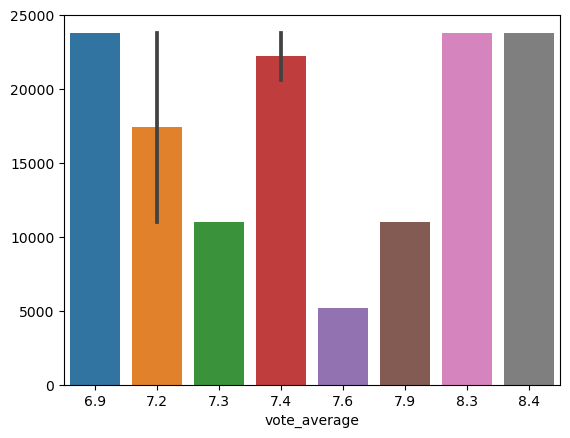

In [470]:
#We create a bargraph that visually describes the vote average

sns.barplot(x = 'vote_average', y = top10_titles.index, data = top10_titles )
plt.title('')


**Recommendations**

- Collaboration and Partnerships:  Forming strategic partnerships can facilitate access to talent, resources, and distribution channels, increasing the chances of success for Microsoft's films. If Microsoft is looking into collaborating with a studio, they should consider Universal Studios because they have created the most number of movie titles compared to other studios

- Have high budgets to invest in high-quality production: Focus on producing films with high production values, compelling storytelling, and engaging visuals. A strong emphasis on quality will help differentiate Microsoft's films from competitors and attract discerning moviegoers. High budgeted movies tend to bring high sales